# Unity Tennis Project

## Import packages

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from agentcommon import AgentCommon

## Create Unity environment

In [2]:
env = UnityEnvironment(file_name="Tennis.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## Multi Agent DDPG Function

Load the function that will train the agent

In [3]:
def maddpg(n_episodes=5000, max_t=1000):
    scores_deque = deque(maxlen=100)
    mvavg_scores = []
    all_scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations
        
        score = np.zeros(num_agents)
        agent.reset()
        for t in range(max_t):
        #while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]               # send the action to the environment                            
            next_states = env_info.vector_observations               # get the next state        
            rewards = env_info.rewards                               # get the reward        
            dones = env_info.local_done                              # see if episode has finished  
            score += rewards
            #print(t)
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            
            if np.any(dones):
                break 
        scores_deque.append(np.max(score))
        all_scores.append(np.max(score))
        mvavg_scores.append(np.mean(scores_deque))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actorL.actor_local.state_dict(), 'checkpoint_actorL.pth')
            torch.save(agent.actorR.actor_local.state_dict(), 'checkpoint_actorR.pth')
            
            torch.save(agent.sharedcritic.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        if np.mean(scores_deque) >= 0.5 and len(scores_deque) == 100:
            print('\rSolved in {} episodes, with mean score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actorL.actor_local.state_dict(), 'checkpoint_actorL.pth')
            torch.save(agent.actorR.actor_local.state_dict(), 'checkpoint_actorR.pth')
            torch.save(agent.sharedcritic.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return all_scores, mvavg_scores

## Train agents

C:\Users\agutier4\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.00
Episode 500	Average Score: 0.06
Episode 600	Average Score: 0.03
Episode 700	Average Score: 0.13
Solved in 757 episodes, with mean score: 0.51


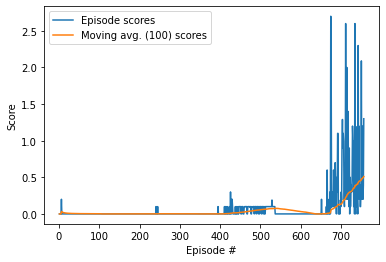

In [5]:
agent = AgentCommon(state_size=state_size, action_size=action_size, num_agents = num_agents, random_seed=1)

scores, mvavg = maddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label='Episode scores')
plt.plot(np.arange(1, len(scores)+1), mvavg, label = 'Moving avg. (100) scores')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

## Close the environment

In [6]:
env.close()